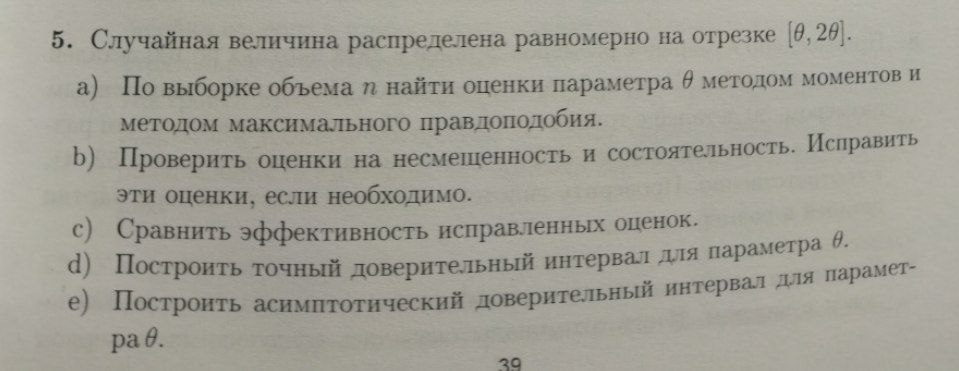

In [2]:
from IPython.display import Image

Image("images/photo_5350494331657645194_y.jpg")

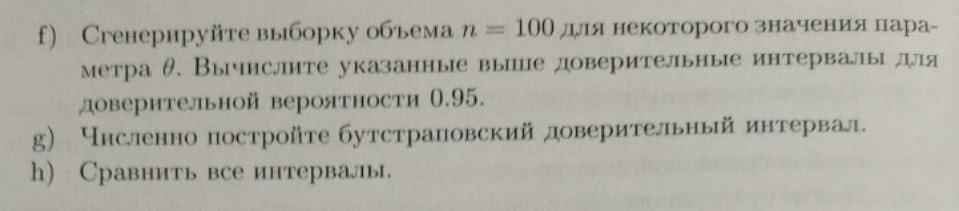

In [3]:
Image("images/photo_5350278556795665965_y.jpg")

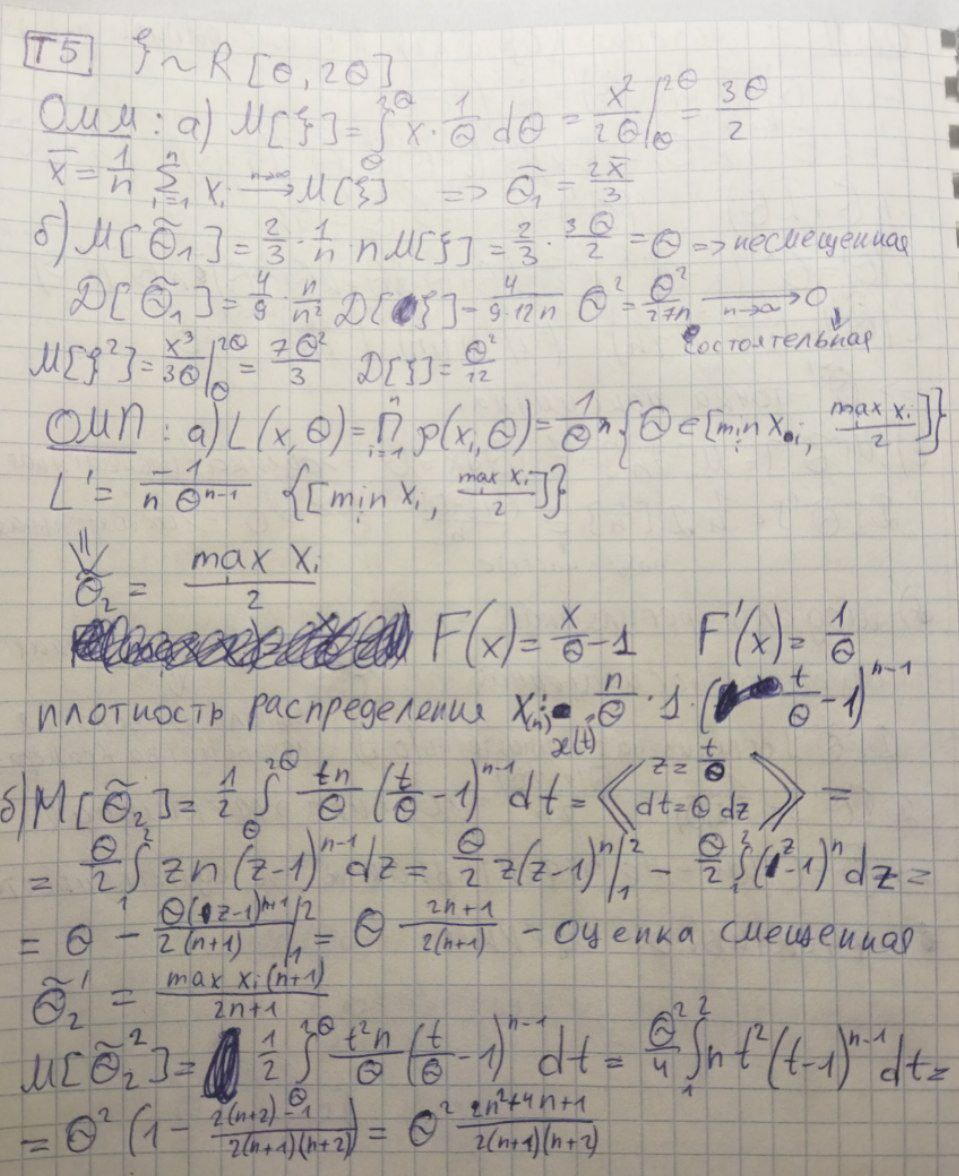

In [4]:
Image("images/photo_5406847798684545507_y.jpg")

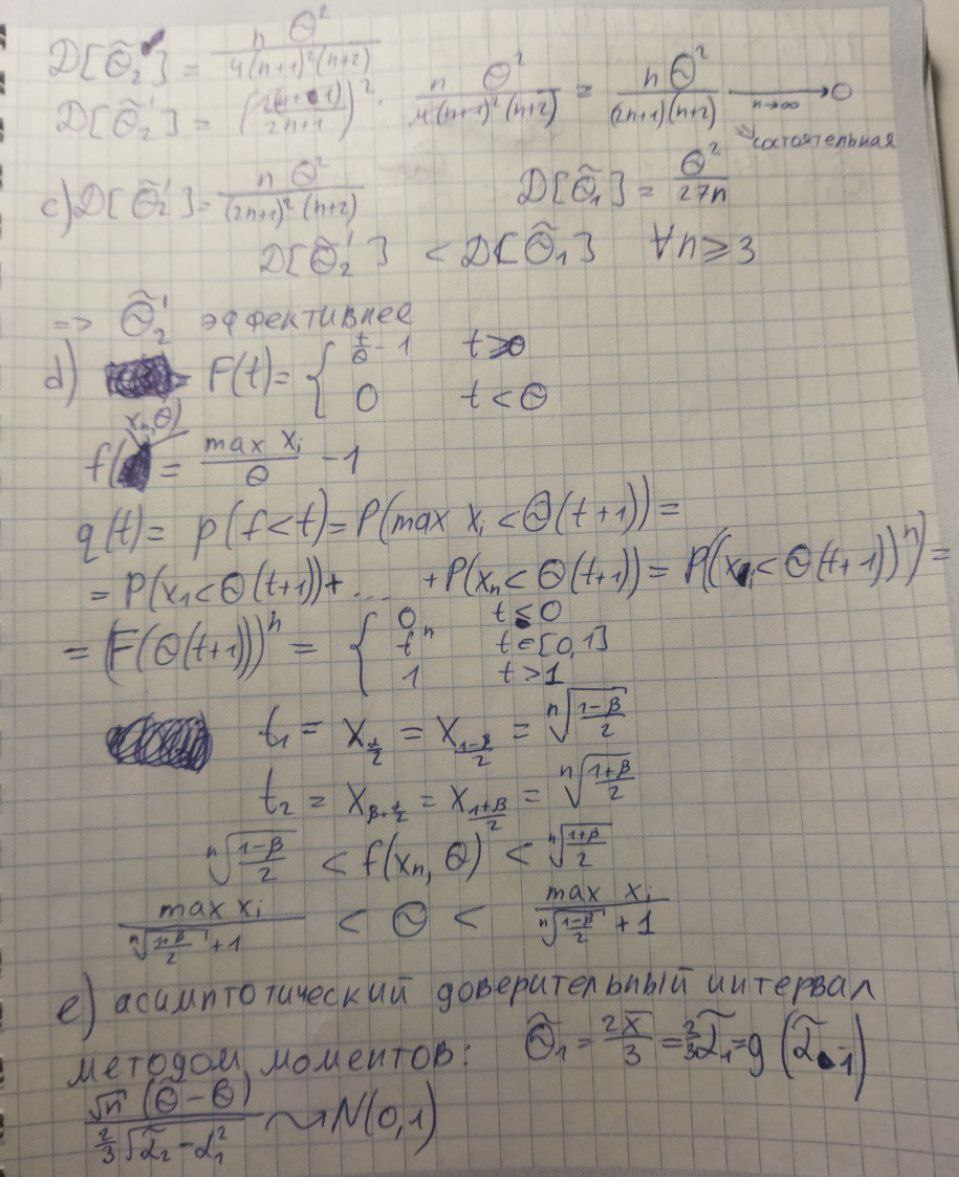

In [5]:
Image("images/photo_5406847798684545508_y.jpg")

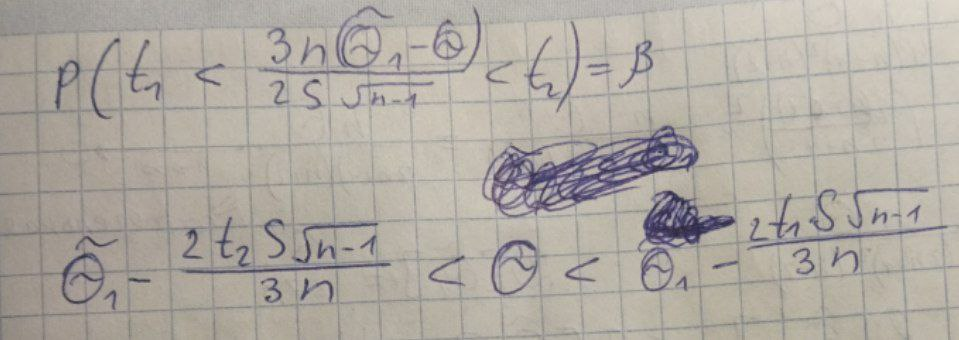

In [6]:
Image("images/photo_5406847798684545509_y.jpg")

In [ ]:

# f)
import numpy as np
import random

def p(x):
    if theta <= x <= 2 * theta:
        return 1 / theta
    else:
        return 0
    
def F(x):
    if (x <= theta):
        return 0
    elif x >= 2 * theta:
        return 1
    else:
        return (x / theta - 1)

def F_reversed(y):
    return theta * (y + 1)


# здесь можно поменять размер генерируемой выборки    
n = 100
theta = 1
sample = []
for i in range(n):
    sample.append(float(F_reversed(random.random())))

beta = 0.95
l_border = np.max(sample) / (((1 + beta) / 2) ** (1 / n) + 1)
r_border = np.max(sample) / (((1 - beta) / 2) ** (1 / n) + 1)
print('Точный интервал = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)

t_1 = -1.96
t_2 = 1.96
theta_1 = 2 / 3 * np.mean(sample)
s = np.sqrt(np.sum([(x - np.mean(sample)) ** 2 for x in sample]) / (n - 1))

l_border = theta_1 - (t_2 * 2 * s * np.sqrt(n - 1)) / (3 * n)
r_border = theta_1 - (t_1 * 2 * s * np.sqrt(n - 1)) / (3 * n)
print('Асимптотический интервал = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)

Точный интервал = ( 0.9976993227877329 , 1.015970588240318 )
l = 0.018271265452585173
Асимптотический интервал = ( 0.960745027041961 , 1.0362901014968033 )
l = 0.07554507445484238


In [ ]:
# g)
bst = 1000
estimation = (n + 1) / (2 * n + 1) * np.max(sample)
delta = []
for i in range(bst):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_theta = (n + 1) / (2 * n + 1) * np.max(bootstrap_sample)
    delta.append(bootstrap_theta - estimation)
delta.sort()
t_1 = delta[int(bst * (1 - beta) / 2)]
t_2 = delta[int(bst * (1 + beta) / 2)]
r_border = -(t_1 - estimation)
l_border = -(t_2 - estimation)
print('Бутстрап интервал = (', l_border, ",", r_border, ')')
print('l =', r_border - l_border)

Бутстрап интервал = ( 1.0025360909299978 , 1.015806511852125 )
l = 0.013270420922127046


#### h)
Доверительный интервал, полученный бутстрапом, оказался самым коротким, но этот метод сужает интервал за счет уменьшения точности результата. Оценка доверительного интервала точным методом оказалась эффективнее асимптотического в несколько раз, при этом в обоих методах точность результата гарантирована.